In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [33]:
advertising = pd.DataFrame(pd.read_csv("../Data/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [34]:
advertising.shape

(200, 4)

In [35]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [36]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
# Checking Null values
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

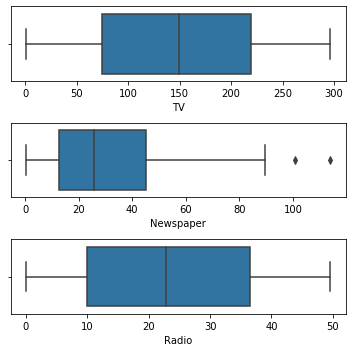

In [38]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [39]:
# There are no considerable outliers present in the data.

## EDA

### Univariate Analysis

#### Sales (Target Variable)

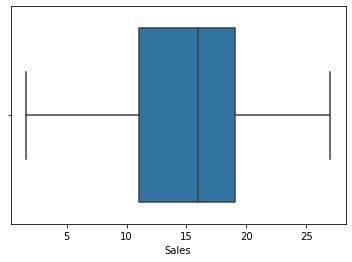

In [40]:
sns.boxplot(advertising['Sales'])
plt.show()

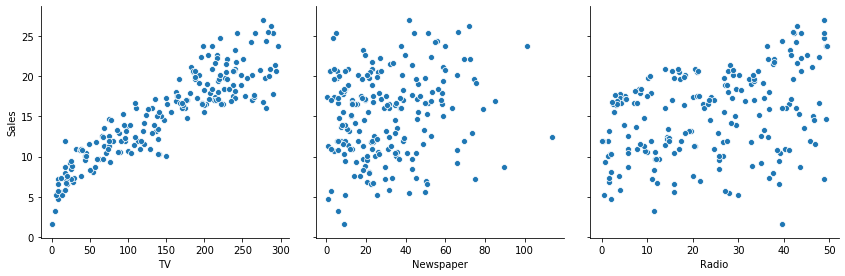

In [41]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

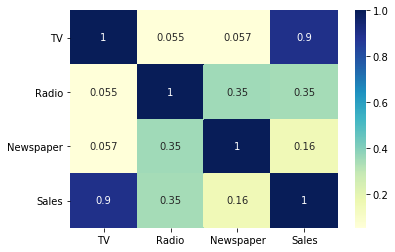

In [42]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

In [43]:
X = advertising['TV'].values.reshape(-1,1)
y = advertising['Sales'].values.reshape(-1,1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
# Simple linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[6.9486832]
[[0.05454575]]


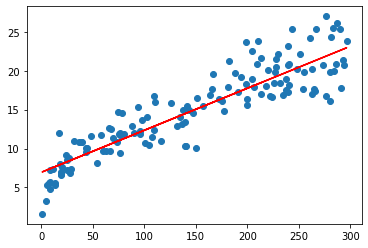

In [48]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [49]:
## To predict the test data with our trained model
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6.6,7.374140
1,20.7,19.941482
2,17.2,14.323269
3,19.4,18.823294
4,21.8,20.132392
5,17.2,18.228745
6,12.2,14.541452
7,16.7,17.726924
8,22.6,18.752384
9,22.3,18.774202
